# Before your start:
- Read the README.md file.
- Comment as much as you can and use the resources (README.md file).
- Happy learning!

In [2]:
# Libraries
import matplotlib.pyplot as plt
from scipy import stats 
import pandas as pd

# Challenge 1 - Generate and Plot Normal Distributions
#### Step 1: Generate samples and test normal distribution.

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed.

**Hint**: Read the documentation for `scipy.stats.norm.rvs`. The function will help you create the normal random samples.

In [4]:
sample_size=[10, 50, 500, 5000]


In [13]:
#we create the distribution iteritably
samples = []
for i in sample_size:
    r = stats.norm.rvs(loc=50, scale= 5, size=int(i))
    samples.append(r)
    
samples

[array([57.44270284, 43.9941702 , 52.08754399, 59.88647132, 46.28571445,
        44.8525709 , 54.04715356, 50.3841492 , 51.79440434, 46.67637073]),
 array([51.9188026 , 50.01761535, 47.15379972, 47.3415131 , 50.06724242,
        49.06199433, 46.94557403, 57.81077399, 53.54014995, 52.83291035,
        48.93531184, 54.20441524, 52.38769632, 42.46718457, 49.13255613,
        47.77403997, 48.65508847, 45.82624651, 46.46969798, 58.44623635,
        57.42833957, 53.39322405, 54.49960738, 45.72041612, 52.43137304,
        51.76441765, 49.65908078, 54.47802334, 54.44350683, 55.04022506,
        52.04245525, 49.36422271, 56.46536814, 47.80047232, 48.22355235,
        44.14853251, 48.20585347, 51.37133991, 54.5806396 , 50.24852414,
        55.26993483, 52.48710715, 48.74336817, 58.94381594, 51.48073916,
        55.68114394, 58.43784046, 51.68307139, 54.41385235, 42.63325572]),
 array([55.80316389, 59.78266969, 54.72347817, 35.92023522, 51.05967644,
        51.31485725, 48.23634684, 40.26742608, 

#### Step 2: Plot normal distributions.

To check the shape of the samples you have just created, you can use matplotlib. For example, you can use it to plot a histogram of each sample. 

If you did, your outputs would be really similar to the ones below:

![normal distributions with different sample sizes](../images/ch-1.png)

In [16]:
serie_index1=pd.Series(samples[0])
serie_index2=pd.Series(samples[1])
serie_index3=pd.Series(samples[2])
serie_index4=pd.Series(samples[3])

(array([  3.,   5.,  12.,  45.,  79., 173., 303., 464., 568., 629., 672.,
        603., 553., 366., 259., 125.,  79.,  35.,  17.,  10.]),
 array([31.99051631, 33.73088451, 35.47125271, 37.2116209 , 38.9519891 ,
        40.6923573 , 42.43272549, 44.17309369, 45.91346189, 47.65383008,
        49.39419828, 51.13456648, 52.87493467, 54.61530287, 56.35567107,
        58.09603926, 59.83640746, 61.57677566, 63.31714385, 65.05751205,
        66.79788025]),
 <a list of 20 Patch objects>)

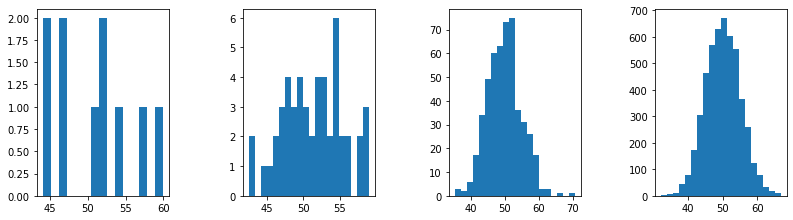

In [24]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 4), linewidth=3)
fig.tight_layout(pad=4)
ax1.hist(serie_index1,bins=15)
ax2.hist(serie_index2,bins=20)
ax3.hist(serie_index3,bins=20)
ax4.hist(serie_index4,bins=20)


#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [ ]:
"""
They are quite similar, and specially for the 5000 observations sample, which probes that the bigger the sample, the more 
its probability distribution approximates to a normal.
"""

#### Bonus: Plot normal distributions.

Even though you still don't know how to use matplotlib, as a bonus challenge, you can try to reproduce the plot above using the samples you have created. This plotting library will be introduced later this week, so don't worry if you don't manage to get the results you want now: you can always come back to solve this challenge later.

In [ ]:
# your code here

# Challenge 2 - Plot Probability Mass Function (PMF)

### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

### Challenge

We assume that the probability of clicking an advertisement in a Youtube video is 0.15. We have a sample of 5 people who watched the video and we want to plot the PMF for a binomial distribution.

#### Step 1: Create the binomial distribution mentioned above. Store the result in a variable called `dist`. 
**Hint**: use binom from `scipy.stats.binom`. This object takes *n* and *p* as shape parameters, where *n* is the number of independent experiments and *p* the probability of success of the experiment.

In [44]:
n=5
p=0.15
dist=stats.binom(n=5,p=0.15)


7.593750000000001e-05

#### Step 2: Plot the PMF of the distribution. 
To do it, run the code in the cell below. 

**Hint**: Your output should look like the one below:

![binom 10](../images/ch-2.png)

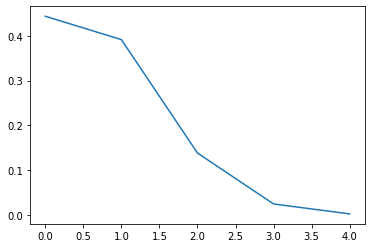

In [48]:
# run this code
x = range(n)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Step 3: Explain what you observe from the plot above.

In [51]:
"""
The y axis represent the probability of clicking and the x axis represents the number of times you repeat the experiment,when you repeat the
experiment 1 time the mean is probability seems to be 0.4 which would be 40%, as we increase the number of trials this
probability of clicking in an ad goes down, so the more people you expose to clicking the ad the less likely they are to clicking all of them.
You are measuring the number of clicks minding that each person can either click once or not.

"""

'\nThe y axis represent the probability of clicking and the x axis represents the number of times you repeat the experiment,when you repeat the\nexperiment 1 time the mean is probability seems to be 0.4 which would be 40%, as we increase the number of trials this\nprobability of clicking in an ad goes down.\n\n'

#### Step 4: Now plot PMF with 50, 500, and 5000 visitors.
To plot the PMF, you can copy the code given above and replace variable `dist` for the name of the variables where you have stored the new binomial objects for 50, 500 and 5000 visitors.

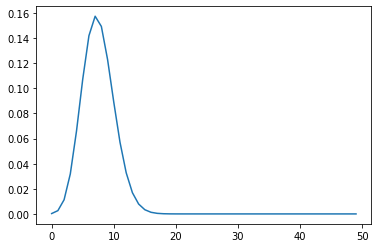

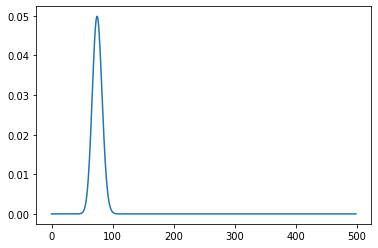

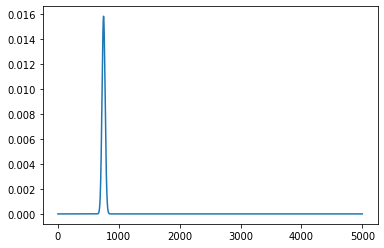

In [50]:
sizes = [50,500,5000]
p=0.15
for i in sizes:
    dist=stats.binom(i,p)
    x = range(i)
    fig, ax = plt.subplots(1, 1)
    plt.plot(x, dist.pmf(x))


#### Step 5: What did you notice from the distribution plots? Comment your findings.

In [52]:
"""
So when there are 50 chances of clicking the proportion of successes or clicks will be close to 0.16 so 0.16*50 =8.
Same for 500 out of 500 people the proportion has gone down, approximately 5% of them so 0.05*500=25 people will click, but if you show it to 
5000 it will be closer to the ideal mean of 0.15*5000=750 people will click.

it's the same as Marta explained with the coin, with few repetitions the mean of success will be randomly over or bellow the
theoretical mean, and as we approximate an infinite number of repetitions we'll get closer to it.
"""

"\nSo when there are 50 chances of clicking the proportion of successes or clicks will be close to 0.16 so 0.16*50 =8.\nSame for 500 out of 500 people the proportion has gone down, approximately 5% of them so 0.05*500=25 people will click, but if you show it to \n5000 it will be closer to the ideal mean of 0.15*5000=750 people will click.\n\nit's the same as Marta explained with the coin, with few repetitions the mean of success will be randomly over or bellow the\ntheoretical mean, and as we approximate an infinite number of repetitions we'll get closer to it.\n"

# Challenge 3
#### Step 1: Research the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [ ]:
"""
It tells us the probability of an event happening in a timeframe, that I get. I do not get how that probability is computed
but I know it depends on the euler number elevated to the rate at which the event happens
"""

#### Step 2: A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

**Hint**: use `scipy.stats.poisson.pmf`.

In [57]:
print(f' The prob of having 320 visits is {round(stats.poisson.pmf(k=320,mu=300)*100,3)}%')

 The prob of having 320 visits is 1.161%


#### Step 3: What is the probability of getting 60 visits?

In [58]:
print(f' The prob of having 60 visits is {round(stats.poisson.pmf(k=60,mu=300)*100,3)}%')

 The prob of having 60 visits is 0.0%


#### Step 4: Create a list to store the Poisson distribution probabilities for 0 to 1000 visitors. Store your list in a variable called `arr`.

In [61]:
arr=[]
for i in range(0,101):
    prob=stats.poisson.pmf(k=i,mu=300)
    arr.append(prob)
arr

[5.148200222412013e-131,
 1.5444600667235709e-128,
 2.3166901000854342e-126,
 2.31669010008539e-124,
 1.7375175750640974e-122,
 1.042510545038448e-120,
 5.212552725192131e-119,
 2.23395116793948e-117,
 8.377316879773299e-116,
 2.7924389599243865e-114,
 8.377316879773059e-113,
 2.2847227853926804e-111,
 5.71180696348157e-110,
 1.318109299264997e-108,
 2.824519926996411e-107,
 5.649039853992778e-106,
 1.0591949726236754e-104,
 1.8691675987476173e-103,
 3.1152793312460596e-102,
 4.918862101967454e-101,
 7.378293152951289e-100,
 1.0540418789930416e-98,
 1.4373298349904852e-97,
 1.874778045639763e-96,
 2.3434725570497126e-95,
 2.812167068459659e-94,
 3.2448081559150323e-93,
 3.605342395461095e-92,
 3.8628668522797225e-91,
 3.996069157530829e-90,
 3.9960691575307916e-89,
 3.8671637008362115e-88,
 3.6254659695339394e-87,
 3.295878154121811e-86,
 2.908127783048746e-85,
 2.492680956898807e-84,
 2.0772341307490223e-83,
 1.684243889796562e-82,
 1.3296662287866792e-81,
 1.0228201759897706e-80,
 7.

#### Step 5: Plot the probabilities.
To do it, run the code in the cell below. Your plot should look like the one below:

![poisson distribution](../images/ch-3.png)

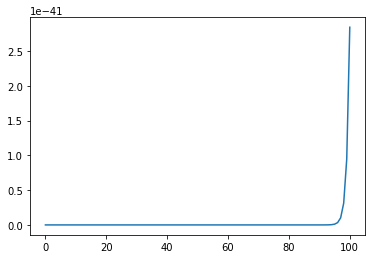

In [62]:
# run this code
plt.plot(arr)
plt.show()

# Challenge 4 - Central Limit Theorem

A delivery company needs 35 minutes to deliver a package, with a standard deviation of 8 minutes. Suppose that in one day, they deliver 200 packages.

**Hint**: `stats.norm.cdf` can help you find the answers.

#### Step 1: What is the probability that the mean delivery time today is between 30 and 35 minutes?

In [73]:
p_30 = stats.norm.cdf(30, loc=35, scale=8)
p_35= stats.norm.cdf(35,loc=35,scale=8)
print(p_30)
print(p_35)
print(f'The probability of delivering a package between 30 and 35 minutes is {round((p_35-p_30)*100,3)}%')

0.26598552904870054
0.5
The probability of delivering a package between 30 and 35 minutes is 23.401%


#### Step 2: What is the probability that in total, it takes more than 115 hours to deliver all 200 packages?

In [76]:
p_115=stats.norm.cdf((115*60/200), loc=35, scale=8)
print(p_115)
print(f'The probability that they take more than 115h to deliver 200 packages is {round((1-p_115)*100,3)}%')

0.47508233097075275
The probability that they take more than 115h to deliver 200 packages is 52.492%


# Challenge 5 - Normal Variables
The value (in thousands) of the monthly sales of a publishing company follows a normal distribution with a mean equal to 200 and a standard deviation equal to 40.

<div align="center">$X → N(200,40)$</div>

**Hint**: `stats.norm.cdf` can help you find the answers.

#### Step 1: Find the probability that the monthly sales are more than 300.

In [78]:
round((1-stats.norm.cdf(300,200,40))*100,3)

0.621

#### Step 2: Find the probability that the monthly sales fall between 160 and 240.

In [80]:
round((stats.norm.cdf(240,200,40)-stats.norm.cdf(160,200,40))*100,3)

68.269

#### Step 3: Find the probability that the monthly sales do not exceed 150.

In [81]:
round((stats.norm.cdf(150,200,40))*100,3)

10.565

#### Step 4: Find the probability that the monthly sales exceed 3000.

In [82]:
round((1-stats.norm.cdf(3000,200,40))*100,3)

0.0

# Challenge 6 - Poisson distribution
The mean number of violent robberies per month that are registered in a particular barrio is 4.

**Hint**: `stats.poisson.cdf` can help you find the answers.

#### Step 1: Find the probability that in a particular month there is no violent robbery.

In [83]:
print(f' The prob of having 0 robberies is {round(stats.poisson.pmf(k=0,mu=4)*100,3)}%')

 The prob of having 0 robberies is 1.832%


#### Step 2: Find the probability that there are at least 1 robbery in a given month.

In [87]:
print(f' The prob of having at least 1 robbery is {round((1-stats.poisson.cdf(k=1,mu=4))*100,3)}%')

 The prob of having at least 1 robbery is 90.842%


#### Step 3: Find the probability that there are between 2 and 6 (inclusive) robberies in a given month.

In [89]:
print(f' The prob of having between 2 and 6 robberies is {round((stats.poisson.cdf(k=6,mu=4)-stats.poisson.cdf(k=2,mu=4))*100,3)}%')

 The prob of having between 2 and 6 robberies is 65.122%


#### Step 4: Find the probability that there are more than 2 robberies in 15 days.

In [92]:
roberies_day=4/30
print(roberies_day*15)

2.0


In [93]:
print(f' The prob of having more than 2 robberies in 15 days is  {round((1-stats.poisson.cdf(k=2,mu=2))*100,3)}%')

 The prob of having more than 2 robberies in 15 days is  32.332%
